Name: Govardhan Digumurthi


# CS 5683 - Big Data Analytics
## Assignment - 5: Graphs

In [ ]:
import networkx as nx

### Assignment Total: 10 points (3% of final)

This is a self-learning assignment for graphs. You will explore a python package called networkx to find some properties of a given graph

NetworkX documentation: https://networkx.org/documentation/stable/reference/index.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Use the social network data 'soc-Epinions1.txt' given in Canvas

In [ ]:
# NOTE: The data is given as an edgelist
# Meaning: each edge (node1,node2) in one line of the input file
input_data = '/content/drive/My Drive/CS5683/soc-Epinions1.txt'#'soc-Epinions1.txt'

In [ ]:
# Load the data as a directed graph
# Note: networkx read_edgelist will read the graph as undirected graph

g = nx.read_edgelist(input_data, nodetype=int, create_using= nx.DiGraph())
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 75879
Number of edges: 508837
Average in degree:   6.7059
Average out degree:   6.7059


##### Print the following basic properties of the given graph

In [ ]:
# Print the number of nodes and edges in the graph here (1 Point)
print(g.number_of_nodes())
print(g.number_of_edges())

75879
508837


In [ ]:
# Print the number of connected components here (1 Point)
# NOTE: There is a networkx package for this
ug = g.to_undirected()
nx.algorithms.components.number_connected_components(ug)

2

In [ ]:
# Print the number of nodes in each component here(1 Point)
count = 0
for x in list(nx.connected_components(ug)):
  count += 1
  print('Number of nodes in the component' + str(count) + ' : ' + str(len(x)))

Number of nodes in the component1 : 75877
Number of nodes in the component2 : 2


In [ ]:
# Delete all nodes from the smallest component in the graph
# And, print the number of node again here (1 Point)
C = min(nx.connected_components(ug), key=len)
for a in C:
  g.remove_node(a)
print(g.number_of_nodes())

75877


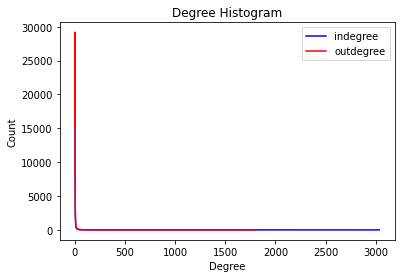

In [ ]:
# Plot the degree distribution of the graph with a line graph here (4 Points)
# NOTE: You have to plot both in-degree and out-degree distribution in the same plot
# REFERENCE: https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree_histogram.html
# You have to get both in_degree and out_degree
# You have to use line plot instead of a histogram
import collections
import matplotlib.pyplot as plt

degree_sequence = sorted([d for n, d in g.in_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
indeg, incnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.plot(indeg, incnt, color="b",  label="indegree")

degree_sequence_out = sorted([d for n, d in g.out_degree()], reverse=True)  # degree sequence
degreeCount_out = collections.Counter(degree_sequence_out)
outdeg, outcnt = zip(*degreeCount_out.items())
plt.plot(outdeg, outcnt, color="r",  label="outdegree")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.legend(loc="upper right")

In [ ]:
# Find pagerank of all nodes in the given graph (2 Points)
# And, print top 10 nodes based on pagerank and their corresponding pagerank scores
pr = nx.pagerank(g)
sorted(pr.items(), key=lambda x: x[1], reverse=True)[:10]

[(18, 0.004657231788608864),
 (737, 0.0028807122172918418),
 (1719, 0.002154581431371963),
 (790, 0.002121539825820732),
 (118, 0.002058844652824279),
 (136, 0.002035196636433736),
 (143, 0.002003692743449366),
 (40, 0.0015924031130032901),
 (1619, 0.0015263447209551528),
 (4415, 0.001478191526616753)]